<a href="https://colab.research.google.com/github/ProsperChuks/GermanyRE-Credit-Card-Approval-Prediction/blob/main/base.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer 
 
text_kwargs = dict(fontsize=30, color='black')
path = '/content/drive/MyDrive/Colab Notebooks/Hamoye Intership/Stage 1/immo_data.csv'
df = pd.read_csv(path)
df.head()

,regio1,serviceCharge,heatingType,telekomTvOffer,telekomHybridUploadSpeed,newlyConst,balcony,picturecount,pricetrend,telekomUploadSpeed,totalRent,yearConstructed,scoutId,noParkSpaces,firingTypes,hasKitchen,geo_bln,cellar,yearConstructedRange,baseRent,houseNumber,livingSpace,geo_krs,condition,interiorQual,petsAllowed,street,streetPlain,lift,baseRentRange,typeOfFlat,geo_plz,noRooms,thermalChar,floor,numberOfFloors,noRoomsRange,garden,livingSpaceRange,regio2,regio3,description,facilities,heatingCosts,energyEfficiencyClass,lastRefurbish,electricityBasePrice,electricityKwhPrice,date
0,Nordrhein_Westfalen,245.00,central_heating,ONE_YEAR_FREE,NaN,False,False,6,4.62,10.0,840.0,1965.0,96107057,1.0,oil,False,Nordrhein_Westfalen,True,2.0,595.0,244,86.00,Dortmund,well_kept,normal,NaN,Sch&uuml;ruferstra&szlig;e,Schüruferstraße,False,4,ground_floor,44269,4.0,181.4,1.0,3.0,4,True,4,Dortmund,Schüren,Die ebenerdig zu erreichende Erdgeschosswohnun...,Die Wohnung ist mit Laminat ausgelegt. Das Bad...,NaN,NaN,NaN,NaN,NaN,May19
1,Rheinland_Pfalz,134.00,self_contained_central_heating,ONE_YEAR_FREE,NaN,False,True,8,3.47,10.0,NaN,1871.0,111378734,2.0,gas,False,Rheinland_Pfalz,False,1.0,800.0,NaN,89.00,Rhein_Pfalz_Kreis,refurbished,normal,no,no_information,NaN,False,5,ground_floor,67459,3.0,NaN,NaN,NaN,3,False,4,Rhein_Pfalz_Kreis,Böhl_Iggelheim,Alles neu macht der Mai – so kann es auch für ...,NaN,NaN,NaN,2019.0,NaN,NaN,May19
2,Sachsen,255.00,floor_heating,ONE_YEAR_FREE,10.0,True,True,8,2.72,2.4,1300.0,2019.0,113147523,1.0,NaN,False,Sachsen,True,9.0,965.0,4,83.80,Dresden,first_time_use,sophisticated,NaN,Turnerweg,Turnerweg,True,6,apartment,1097,3.0,NaN,3.0,4.0,3,False,4,Dresden,Äußere_Neustadt_Antonstadt,Der Neubau entsteht im Herzen der Dresdner Neu...,"* 9 m² Balkon\n* Bad mit bodengleicher Dusche,...",NaN,NaN,NaN,NaN,NaN,Oct19
3,Sachsen,58.15,district_heating,ONE_YEAR_FREE,NaN,False,True,9,1.53,40.0,NaN,1964.0,108890903,NaN,district_heating,False,Sachsen,False,2.0,343.0,35,58.15,Mittelsachsen_Kreis,NaN,NaN,NaN,Gl&uuml;ck-Auf-Stra&szlig;e,Glück-Auf-Straße,False,2,other,9599,3.0,86.0,3.0,NaN,3,False,2,Mittelsachsen_Kreis,Freiberg,Abseits von Lärm und Abgasen in Ihre neue Wohn...,NaN,87.23,NaN,NaN,NaN,NaN,May19
4,Bremen,138.00,self_contained_central_heating,NaN,NaN,False,True,19,2.46,NaN,903.0,1950.0,114751222,NaN,gas,False,Bremen,False,1.0,765.0,10,84.97,Bremen,refurbished,NaN,NaN,Hermann-Henrich-Meier-Allee,Hermann-Henrich-Meier-Allee,False,5,apartment,28213,3.0,188.9,1.0,NaN,3,False,4,Bremen,Neu_Schwachhausen,Es handelt sich hier um ein saniertes Mehrfami...,Diese Wohnung wurde neu saniert und ist wie fo...,NaN,NaN,NaN,NaN,NaN,Feb20


### Cleaning and Imputation

In [3]:
df_missval = df.isnull().sum()

# filtering for variables with value greater than 0 i.e variable of interest
df_missval[df_missval > 0]

irrelevant_cols=[ 'serviceCharge','telekomTvOffer','telekomHybridUploadSpeed', 'newlyConst', 'picturecount', 
       'telekomUploadSpeed','scoutId', 'noParkSpaces', 'firingTypes', 'geo_bln','houseNumber',
       'geo_krs','petsAllowed','street', 'streetPlain', 'geo_plz','thermalChar','floor', 'numberOfFloors', 
       'heatingCosts', 'energyEfficiencyClass','lastRefurbish', 'description', 'facilities',
       'electricityBasePrice', 'electricityKwhPrice', 'date']

df = df.drop(irrelevant_cols, axis=1)

# filling missing values(numeric) with interpolation
df['pricetrend'] = df['pricetrend'].interpolate()
df['totalRent'] = df['totalRent'].interpolate()
df['yearConstructed'] = df['yearConstructed'].interpolate()
df['yearConstructedRange'] = df['yearConstructedRange'].interpolate()

# filling missing values(categorical) with mean(most-frequent)
mode_imputer = SimpleImputer(missing_values=np.NaN, strategy='most_frequent')

mode_imputer = mode_imputer.fit(df[['typeOfFlat']])
df['typeOfFlat'] = mode_imputer.transform(df[['typeOfFlat']]).ravel()

mode_imputer = mode_imputer.fit(df[['heatingType']])
df['heatingType'] = mode_imputer.transform(df[['heatingType']]).ravel()

mode_imputer = mode_imputer.fit(df[['condition']])
df['condition'] = mode_imputer.transform(df[['condition']]).ravel()

mode_imputer = mode_imputer.fit(df[['interiorQual']])
df['interiorQual'] = mode_imputer.transform(df[['interiorQual']]).ravel()

df.isnull().any()

regio1                  False
heatingType             False
balcony                 False
pricetrend              False
totalRent               False
yearConstructed         False
hasKitchen              False
cellar                  False
yearConstructedRange    False
baseRent                False
livingSpace             False
condition               False
interiorQual            False
lift                    False
baseRentRange           False
typeOfFlat              False
noRooms                 False
noRoomsRange            False
garden                  False
livingSpaceRange        False
regio2                  False
regio3                  False
dtype: bool

## 1 : Did rents increase over time?

### Visualizing Rent Prices Over-Time

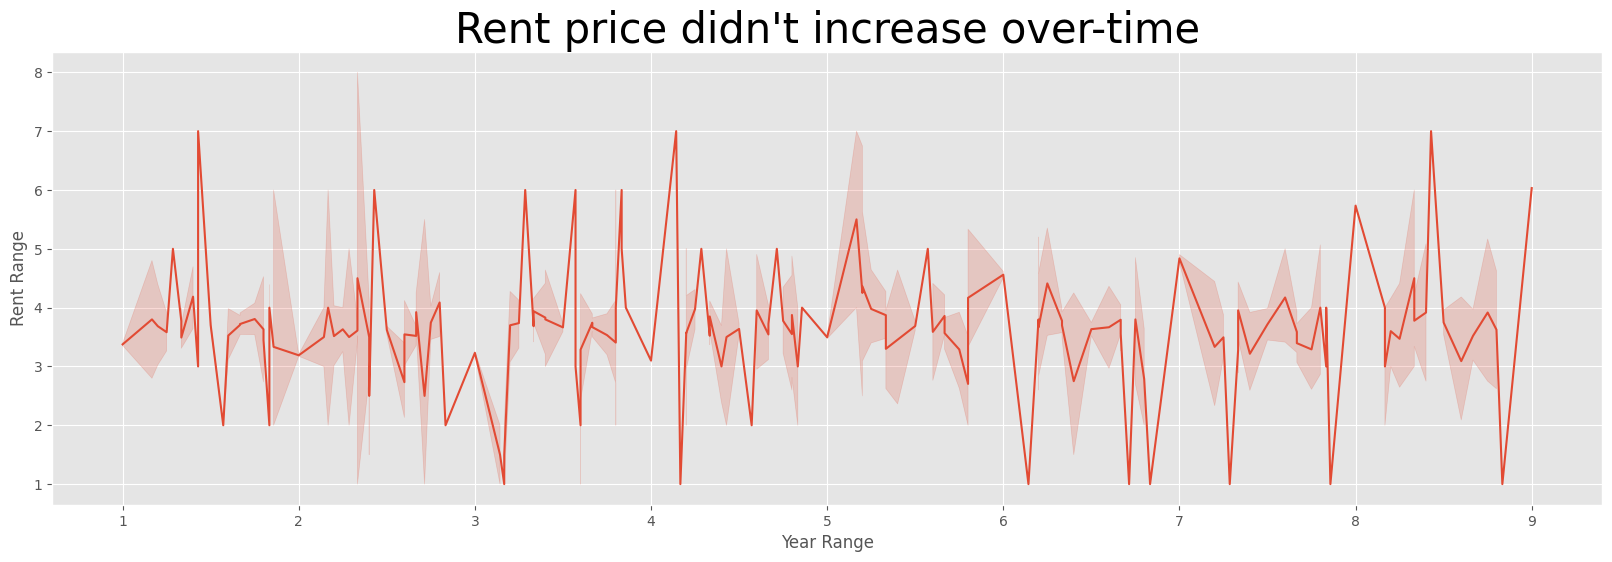

In [12]:
plt.figure(figsize=(20,6), dpi=100)
plt.title('Rent price didn\'t increase over-time', **text_kwargs)

sns.lineplot(x='yearConstructedRange', y='baseRentRange', data=df)
plt.xlabel('Year Range')
plt.ylabel('Rent Range')

plt.savefig('/content/drive/MyDrive/Colab Notebooks/matplotlib/rent_over-time.png')
plt.show()

## 2 : Which areas are the most expensive?

### Grouping the Regions

In [5]:
# clearing the duplicate cities to extra the cities from region1
region = df['regio1'].drop_duplicates().reset_index(drop=True)
print(region)

# grouping the regio1 cities
nordrhein_region = df.loc[df['regio1'] == region[0]]
rheinland_region = df.loc[df['regio1'] == region[1]]
sachsen_region = df.loc[df['regio1'] == region[2]]

bremen_region = df.loc[df['regio1'] == region[3]]
schleswig_region = df.loc[df['regio1'] == region[4]]
baden_region = df.loc[df['regio1'] == region[5]]

thüringen_region = df.loc[df['regio1'] == region[6]]
hessen_region = df.loc[df['regio1'] == region[7]]
niedersachsen_region = df.loc[df['regio1'] == region[8]]

bayern_region = df.loc[df['regio1'] == region[9]]
hamburg_region = df.loc[df['regio1'] == region[10]]
sachsen_an_region = df.loc[df['regio1'] == region[11]]

mecklenburg_region = df.loc[df['regio1'] == region[12]]
berlin_region = df.loc[df['regio1'] == region[13]]
brandenburg_region = df.loc[df['regio1'] == region[14]]
saarland_region = df.loc[df['regio1'] == region[15]]

0        Nordrhein_Westfalen
1            Rheinland_Pfalz
2                    Sachsen
3                     Bremen
4         Schleswig_Holstein
5          Baden_Württemberg
6                  Thüringen
7                     Hessen
8              Niedersachsen
9                     Bayern
10                   Hamburg
11            Sachsen_Anhalt
12    Mecklenburg_Vorpommern
13                    Berlin
14               Brandenburg
15                  Saarland
Name: regio1, dtype: object



### Visualizing the most-expensive areas

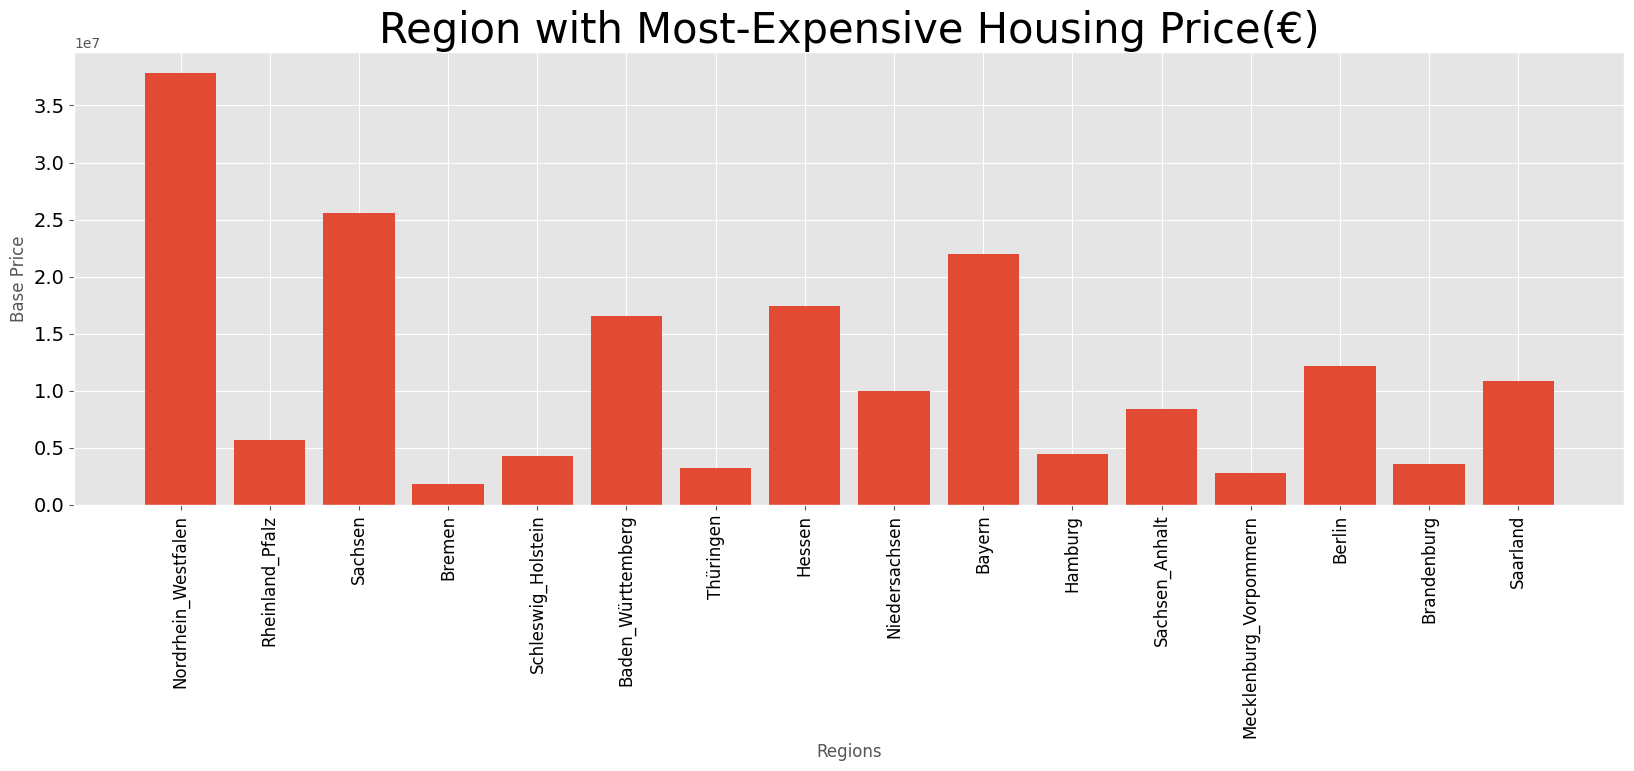

In [6]:
plt.figure(figsize=(20,6), dpi=100)
plt.style.use('ggplot')

prices = np.array([nordrhein_region['baseRent'].sum(), rheinland_region['baseRent'].sum(), sachsen_region['baseRent'].sum(),
                   bremen_region['baseRent'].sum(),schleswig_region['baseRent'].sum(),baden_region['baseRent'].sum(),thüringen_region['baseRent'].sum(),
                   hessen_region['baseRent'].sum(),niedersachsen_region['baseRent'].sum(),bayern_region['baseRent'].sum(),
                   hamburg_region['baseRent'].sum(),sachsen_an_region['baseRent'].sum(),mecklenburg_region['baseRent'].sum(),
                   berlin_region['baseRent'].sum(),brandenburg_region['baseRent'].sum(),saarland_region['baseRent'].sum()])

plt.bar(region, prices)
plt.title('Region with Most-Expensive Housing Price(€)', **text_kwargs)

plt.ylabel('Base Price', fontsize=12)
plt.xlabel('Regions', fontsize=12)
plt.xticks(fontsize=12, color='black', rotation=90)
plt.yticks(fontsize=14,  color='black')

plt.savefig('/content/drive/MyDrive/Colab Notebooks/matplotlib/most expensive region.png')

plt.show()

## 3 : Which areas saw the largest increase, which areas became cheaper?

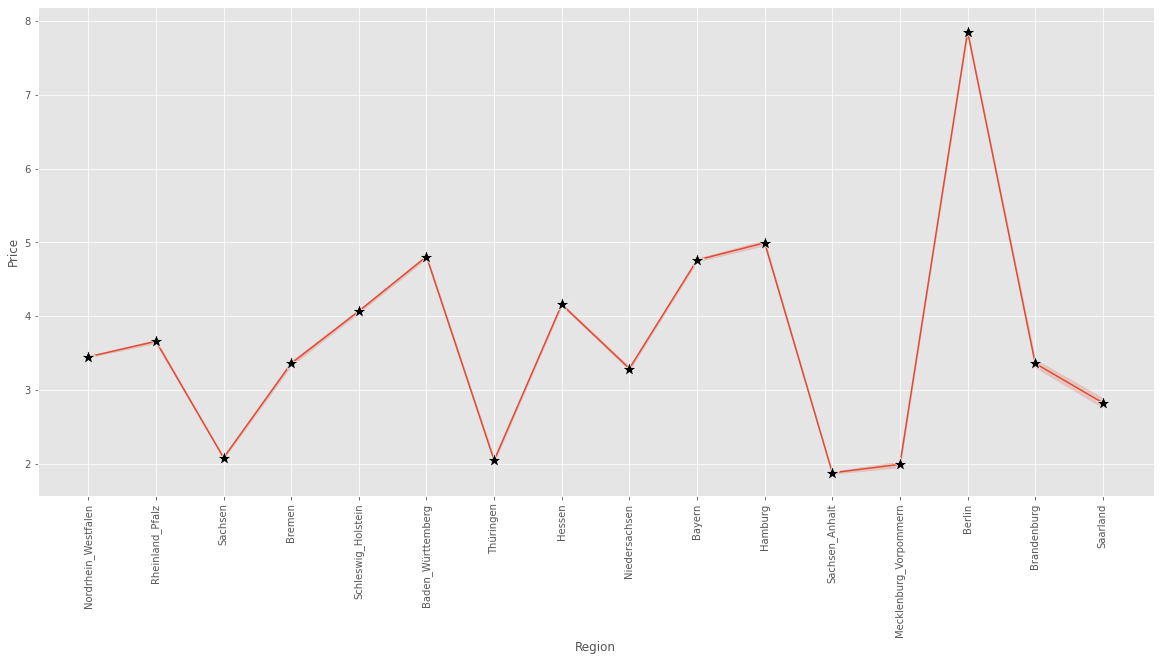

In [13]:
plt.figure(figsize=(20,9))

sns.lineplot(x='regio1', y='pricetrend', data=df, marker='*', markersize=15, markerfacecolor='black')
plt.xlabel('Region')
plt.ylabel('Price')

plt.xticks(rotation=90)

plt.savefig('/content/drive/MyDrive/Colab Notebooks/matplotlib/trend.png')
plt.show()

Berlin had the Largest Increase and
Sachsen_Anhalt became cheaper

## 4 : Are there any duplicates? If yes, how many?

In [14]:
df[df.duplicated()]

,regio1,heatingType,balcony,pricetrend,totalRent,yearConstructed,hasKitchen,cellar,yearConstructedRange,baseRent,livingSpace,condition,interiorQual,lift,baseRentRange,typeOfFlat,noRooms,noRoomsRange,garden,livingSpaceRange,regio2,regio3
2811,Sachsen,central_heating,False,3.28,678.00,1920.0,True,False,1.0,458.00,62.35,refurbished,sophisticated,False,3,apartment,2.0,2,False,3,Leipzig,Mockau_Süd
5832,Hessen,central_heating,True,5.28,2445.00,1999.0,True,True,5.0,1995.00,128.00,fully_renovated,sophisticated,True,8,maisonette,4.0,4,True,6,Frankfurt_am_Main,Sachsenhausen_Nord
7555,Sachsen,central_heating,False,1.72,485.00,1989.0,False,True,4.0,332.00,63.70,mint_condition,normal,False,2,apartment,3.0,3,False,3,Bautzen_Kreis,Kamenz
9410,Sachsen,district_heating,True,2.78,1295.00,2019.0,False,False,9.0,1035.00,129.26,first_time_use,sophisticated,True,7,maisonette,4.0,4,True,6,Leipzig,Böhlitz_Ehrenberg
9817,Nordrhein_Westfalen,gas_heating,True,1.79,639.78,1967.0,False,False,2.0,402.93,72.60,modernized,normal,False,3,apartment,3.0,3,False,3,Duisburg,Neuenkamp
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268698,Sachsen_Anhalt,district_heating,True,5.77,432.00,1976.0,False,False,3.0,305.00,50.74,modernized,normal,False,2,apartment,2.0,2,False,2,Halle_Saale,Südstadt
268786,Sachsen,central_heating,True,6.17,1123.88,2019.0,False,False,9.0,868.45,102.17,mint_condition,normal,False,6,apartment,4.0,4,False,5,Leipzig,Zentrum_Südost
268801,Mecklenburg_Vorpommern,gas_heating,True,2.81,258.00,1999.0,False,True,5.0,190.00,28.54,negotiable,normal,False,1,apartment,1.0,1,False,1,Mecklenburg_Strelitz_Kreis,Friedland
268815,Sachsen_Anhalt,central_heating,True,1.32,494.16,1984.0,False,True,4.0,329.87,65.45,fully_renovated,normal,False,2,apartment,4.0,4,False,3,Halle_Saale,Südliche_Neustadt


In [16]:
len(df[df.duplicated()])

2824

There are 2824 duplicated values